In [2]:
import os
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
PATH = '/home/kai/data/kaggle/homecredit/'


# 
12 | 195m26s | [35m   0.79743[0m | [32m            0.8630[0m | [32m              293.1967[0m | [32m            0.1628[0m | [32m     0.1247[0m | [32m     0.2139[0m | [32m     8.9266[0m | [32m           45.9395[0m | [32m          0.0709[0m | [32m     59.9600[0m | [32m            1.0467[0m | 

-----

 Step |   Time |      Value |   bagging_fraction |   early_stopping_round |   feature_fraction |   lambda_l1 |   lambda_l2 |   max_depth |   min_child_weight |   min_split_gain |   num_leaves |   scale_pos_weight |

In [2]:
# categorical_feats = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
# 'NAME_HOUSING_TYPE',
# 'OCCUPATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
# 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
# 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
# 'NAME_TYPE_SUITE'] 

In [3]:
train = pd.read_pickle(PATH +'train_bo0.pkl')
test = pd.read_pickle(PATH +'test_bo0.pkl')

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
PATH = '/home/kai/data/kaggle/homecredit/'
print('begin cv')
target = train['TARGET']
train_df = train.copy()
test_df = test.copy()
ignore_cols = ['ORGANIZATION_TYPE', 'TARGET', 'SK_ID_CURR']
features = [x for x in train.columns if x not in ignore_cols]
train = train[features]
test = test[features]

from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm

lgbm_train = lgbm.Dataset(data=train,
                          label=target,

                          categorical_feature=[],
                          free_raw_data=False)

lgbm_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.02,
    'num_iteration': 4000,
    'num_threads': 8,

    'num_leaves': int(round(44.368535336628419)),
    'feature_fraction': 0.15,
    'bagging_fraction': 0.94901525271474951,
    'max_depth': int(round(8.0430115561596267)),
    'lambda_l1': 0.30680079516647751,
    'lambda_l2': 0.079128660903201031,
    'min_split_gain': 0.054005067457890979,
    'min_child_weight': 15.172643147364937}


cv_results = lgbm.cv(train_set=lgbm_train,
                     params=lgbm_params,
                     nfold=5,
                     early_stopping_rounds=150,
                     verbose_eval=100,
                     metrics=['auc'])

optimum_boost_rounds = np.argmax(cv_results['auc-mean'])
print('Optimum boost rounds = {}'.format(optimum_boost_rounds))
print('Best CV result = {}'.format(np.max(cv_results['auc-mean'])))

clf = lgbm.train(train_set=lgbm_train,
                 params=lgbm_params,
                 num_boost_round=optimum_boost_rounds,
                verbose_eval=100)

""" Predict on test set and create submission """
y_pred = clf.predict(train)
out_df = pd.DataFrame({'SK_ID_CURR': train_df['SK_ID_CURR'], 'TARGET': y_pred})
#     small_len = out_df[out_df['TARGET']< threshold1]
#     large_len = out_df[out_df['TARGET']> threshold2]
#     print('length of small and large,',len(small_len),len(large_len))
print((out_df['TARGET']>0.5).sum(),'more than half')


begin cv


/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:390: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	cv_agg's auc: 0.761279 + 0.00336603
[200]	cv_agg's auc: 0.77363 + 0.00278012
[300]	cv_agg's auc: 0.782606 + 0.00269742
[400]	cv_agg's auc: 0.787647 + 0.00262401
[500]	cv_agg's auc: 0.790502 + 0.00240743
[600]	cv_agg's auc: 0.792433 + 0.00223408
[700]	cv_agg's auc: 0.79367 + 0.00223838
[800]	cv_agg's auc: 0.794572 + 0.00220899
[900]	cv_agg's auc: 0.795125 + 0.00211476
[1000]	cv_agg's auc: 0.795581 + 0.00218749
[1100]	cv_agg's auc: 0.795764 + 0.00210343
[1200]	cv_agg's auc: 0.795837 + 0.00201961
[1300]	cv_agg's auc: 0.796017 + 0.00198905
[1400]	cv_agg's auc: 0.796035 + 0.00194835


[200]	cv_agg's auc: 0.761502 + 0.00093449
[400]	cv_agg's auc: 0.776604 + 0.00152328
[600]	cv_agg's auc: 0.785927 + 0.00168464
[800]	cv_agg's auc: 0.790588 + 0.00175235
[1000]	cv_agg's auc: 0.793122 + 0.00176305
[1200]	cv_agg's auc: 0.794645 + 0.00168944
[1400]	cv_agg's auc: 0.795628 + 0.00164546
[1600]	cv_agg's auc: 0.796271 + 0.0016294
[1800]	cv_agg's auc: 0.79667 + 0.00162439
[2000]	cv_agg's auc: 0.796976 + 0.00155727
[2200]	cv_agg's auc: 0.797135 + 0.00153155
[2400]	cv_agg's auc: 0.797296 + 0.00149684
[2600]	cv_agg's auc: 0.79741 + 0.00148
[2800]	cv_agg's auc: 0.797406 + 0.00144878

baye paras/train with modified prev"
----------
begin cv
/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:390: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
[100]	cv_agg's auc: 0.780408 + 0.00290047
[200]	cv_agg's auc: 0.789804 + 0.00263968
[300]	cv_agg's auc: 0.792796 + 0.00252429
[400]	cv_agg's auc: 0.79391 + 0.00252326
[500]	cv_agg's auc: 0.794314 + 0.00242975
[600]	cv_agg's auc: 0.794392 + 0.00237447
[700]	cv_agg's auc: 0.794313 + 0.00234948
Optimum boost rounds = 617
Best CV result = 0.7944380747322322

without std bayes para, 7788 (train with prev)
with std bayes para, 7789 (train without prev)

baseline bayes para, train only pre+: 
    [100]	cv_agg's auc: 0.780408 + 0.00290047
[200]	cv_agg's auc: 0.789804 + 0.00263968
[300]	cv_agg's auc: 0.792796 + 0.00252429

In [8]:
(out_df['TARGET']>0.5).sum()
# out_df.to_csv(PATH+'submission/06_29_0.csv', index = False)

3274

# AUC for train

In [12]:
out_df.rename(index= str, columns = {'TARGET': 'pred'}, inplace = True)

In [16]:
out_df.head()
train = pd.read_csv(PATH + 'application_train.csv')
train = train[['SK_ID_CURR', 'TARGET']]


In [17]:
out_df = out_df.merge(train, on = 'SK_ID_CURR', how = 'left')

In [20]:
pred_1 = out_df[out_df['TARGET'] == 1]
pred_0 = out_df[out_df['TARGET'] == 0]

In [34]:
x = pred_1[pred_1.pred < 0.1]


In [43]:
pred_1 = out_df[out_df['TARGET'] == 1]
y = pred_1[pred_1.pred >= 0.1]
len(y)

20064

In [45]:
_df = pd.DataFrame(nan_list_1)
_df.describe()

,0
count,20064.000000
mean,724.617524
std,375.383666
min,22.000000
25%,447.000000
50%,749.000000
75%,853.000000
max,2214.000000


In [44]:
y = y.merge(train_ori, on = 'SK_ID_CURR', how = 'left')
nan_list_1 = []
for i in range(y.shape[0]):
    nan_list_1.append(y.loc[i].isnull().sum())


,0
count,4761.000000
mean,801.951061
std,372.986149
min,57.000000
25%,622.000000
50%,772.000000
75%,870.000000
max,2214.000000


In [35]:
train_ori = pd.read_pickle(PATH +'train_bo0.pkl')
x = x.merge(train_ori, on = 'SK_ID_CURR', how = 'left')

In [38]:
nan_list = []
for i in range(x.shape[0]):
    nan_list.append(x.loc[i].isnull().sum())

In [40]:
df = pd.DataFrame(nan_list)

In [48]:
train = pd.read_csv(PATH + 'application_train.csv')
test = pd.read_csv(PATH + 'application_test.csv')
inst = pd.read_csv(PATH + 'installments_payments.csv')

In [49]:
df = pd.concat([train,test],axis = 0)
set1 = set(df.SK_ID_CURR)
set_train = set(train.SK_ID_CURR)
set_test = set(test.SK_ID_CURR)

In [58]:
for sub in [prev, pos, install, bureau]:
    set_sub = set(sub.SK_ID_CURR)
    pct_train = 1 - len(set_train - set_sub)/len(set_train)
    pct_test = 1 - len(set_test - set_sub)/len(set_test)
    pct_all = 1 - len(set1 - set_sub)/len(set1)
    print(sub.shape)
    print((pct_train),( pct_test),( pct_all))

(356255, 818)
1.0 1.0 1.0
(356255, 137)
1.0 1.0 1.0
(339587, 261)
0.9483985938714388 0.9835877236172658 0.9532132882345511
(356255, 554)
1.0 1.0 1.0


In [1]:
import os
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
PATH = '/home/kai/data/kaggle/homecredit/'


In [2]:
train = pd.read_csv(PATH + 'application_train.csv')
test = pd.read_csv(PATH + 'application_test.csv')
prev = pd.read_pickle(PATH + 'test/prev2curr_0.pkl')
print(prev.shape)
pos = pd.read_pickle(PATH +'test/pos/all_agg.pkl')
print(pos.shape)
install = pd.read_pickle(PATH + 'inter/brandnew_inst2curr_with_days.pkl')
print(install.shape)
bureau = pd.read_pickle(PATH + 'inter/bureau2curr.pkl')
print(bureau.shape)

(356255, 818)
(356255, 137)
(339587, 261)
(356255, 554)


In [3]:
for sub in [prev,pos,install,bureau]:
    print(sub.shape[0])
    tmp = sub.isnull().sum(axis=1) == sub.shape[1]-1
    sub = sub[~tmp]
    print(sub.shape[0])

356255
338857
356255
337252
339587
339587
356255
305811


In [4]:
df = pd.concat([train,test],axis = 0)
prev = prev.merge(df[['SK_ID_CURR', 'TARGET']], on = 'SK_ID_CURR', how = 'left')

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [5]:
install_train = prev[~prev.TARGET.isnull()]
install_test = prev[prev.TARGET.isnull()]


In [6]:
print(install_test.shape, install_train.shape)
install_test.drop('TARGET', axis = 1, inplace = True)

(48744, 819) (307511, 819)


/home/kai/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
install_test.shape
train = install_train.copy()
test = install_test.copy()

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)
PATH = '/home/kai/data/kaggle/homecredit/'
print('begin cv')
target = train['TARGET']
test_df = test.copy()
ignore_cols = ['ORGANIZATION_TYPE', 'TARGET', 'SK_ID_CURR']
features = [x for x in train.columns if x not in ignore_cols]
train = train[features]
test = test[features]

from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm

lgbm_train = lgbm.Dataset(data=train,
                          label=target,

                          categorical_feature=[],#categorical_feats,
                          free_raw_data=False)

lgbm_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.02,
    'num_iteration': 4000,
    'num_threads': 8,

    'num_leaves': int(round(44.368535336628419)),
    'feature_fraction': 0.15,
    'bagging_fraction': 0.94901525271474951,
    'max_depth': int(round(8.0430115561596267)),
    'lambda_l1': 0.30680079516647751,
    'lambda_l2': 0.079128660903201031,
    'min_split_gain': 0.054005067457890979,
    'min_child_weight': 15.172643147364937,
    'scall_pos_weight': 15
}


cv_results = lgbm.cv(train_set=lgbm_train,
                     params=lgbm_params,
                     nfold=5,
                     early_stopping_rounds=150,
                     verbose_eval=100,
                     metrics=['auc'])

optimum_boost_rounds = np.argmax(cv_results['auc-mean'])
print('Optimum boost rounds = {}'.format(optimum_boost_rounds))
print('Best CV result = {}'.format(np.max(cv_results['auc-mean'])))

clf = lgbm.train(train_set=lgbm_train,
                 params=lgbm_params,
                 num_boost_round=optimum_boost_rounds,
                verbose_eval=100)

""" Predict on test set and create submission """
y_pred = clf.predict(test)
out_df = pd.DataFrame({'SK_ID_CURR': test_df['SK_ID_CURR'], 'TARGET': y_pred})
print((out_df['TARGET']>0.5).sum(),'more than half')


begin cv


/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:390: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	cv_agg's auc: 0.658768 + 0.00301936
[200]	cv_agg's auc: 0.668822 + 0.0030365
[300]	cv_agg's auc: 0.67493 + 0.00271127
[400]	cv_agg's auc: 0.677349 + 0.0026052
[500]	cv_agg's auc: 0.678367 + 0.00248099
[600]	cv_agg's auc: 0.678685 + 0.00257788
[700]	cv_agg's auc: 0.678713 + 0.00252441
Optimum boost rounds = 626
Best CV result = 0.6788244839523253


/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


6 more than half


In [9]:
y_pred = clf.predict(train)
train = pd.read_csv(PATH + 'application_train.csv')
out_df0 = pd.DataFrame({'SK_ID_CURR': train['SK_ID_CURR'], 'TARGET': y_pred})

In [10]:
out_df0.rename(index= str, columns = {'TARGET': 'pred'}, inplace = True)
out_df0.head()
train = pd.read_csv(PATH + 'application_train.csv')
train = train[['SK_ID_CURR', 'TARGET']]
out_df0 = out_df0.merge(train, on = 'SK_ID_CURR', how = 'left')
pred_1 = out_df0[out_df0['TARGET'] == 1]
pred_0 = out_df0[out_df0['TARGET'] == 0] 

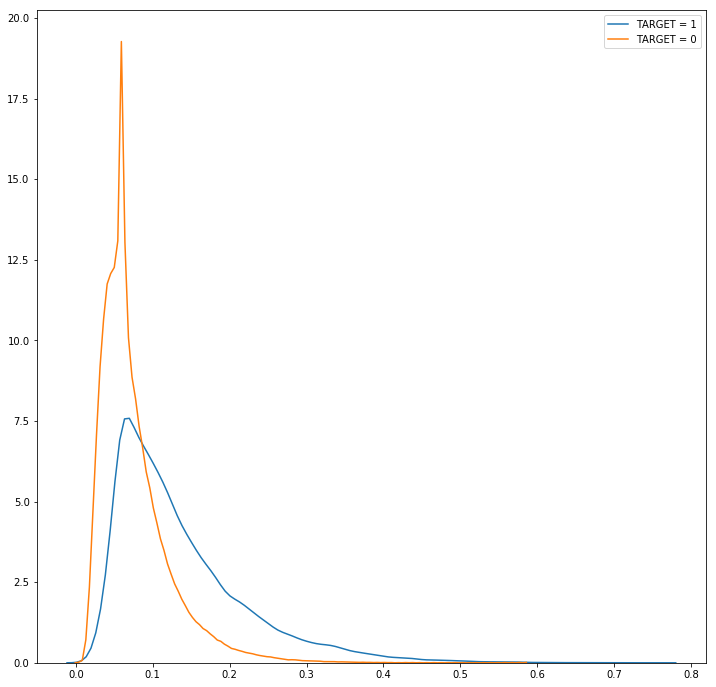

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,12))
sns.kdeplot(pred_1['pred'], label = 'TARGET = 1')
sns.kdeplot(pred_0['pred'], label = 'TARGET = 0')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm
fig, (ax, ax1) = plt.subplots(1, 2, figsize=[15, 7])
lgbm.plot_importance(clf, ax=ax, max_num_features=30, importance_type='split')
lgbm.plot_importance(clf, ax=ax1, max_num_features=30, importance_type='gain')
ax.set_title('Importance by splits')
ax1.set_title('Importance by gain')
plt.tight_layout()
plt.show()

x = [x for x in zip(clf.feature_name(), clf.feature_importance('gain'))]
x.sort(key=lambda x: x[1], reverse=True)
x = [(i, j) for i, j in enumerate(x)]
x


In [ ]:

x = [x for x in zip(clf.feature_name(), clf.feature_importance('split'))]
x.sort(key=lambda x: x[1], reverse=True)
x = [(i, j) for i, j in enumerate(x)]
x